# 평가조건
1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?
    - 기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부를 기술하였다.
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?
    - 앞서 기획한 서비스에서 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시하고, 평가기준에 적합한 테스트 데이터의 특징이 무엇인지 설명하였다.
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?
    - 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

# 구현하려는 OCR 서비스
## - 인터넷에서 수집한 제품의 광고 이미지에서 제품의 특징이 될 수 있는 단어를 추출하는 서비스 구현이 목적

# 모듈 임포트

In [1]:
import os
import cv2
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import keras_ocr

# 모델 다운로드

In [2]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


# 이미지 불러오기

1번째 이미지


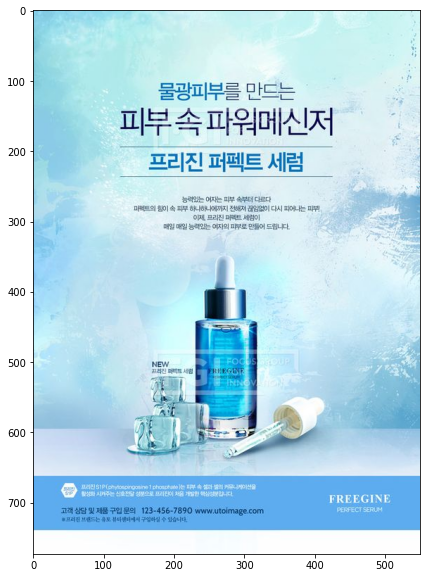

2번째 이미지


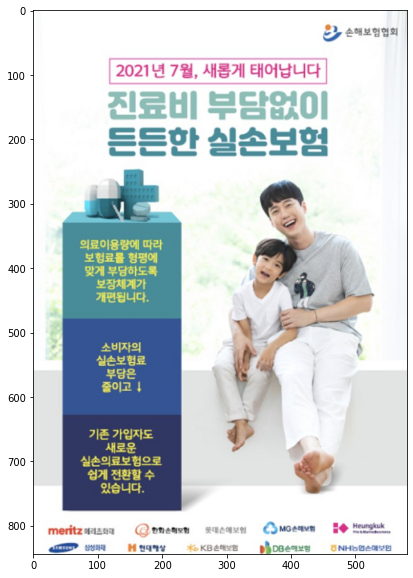

3번째 이미지


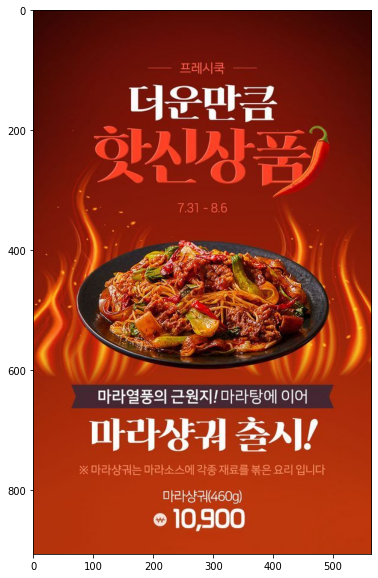

4번째 이미지


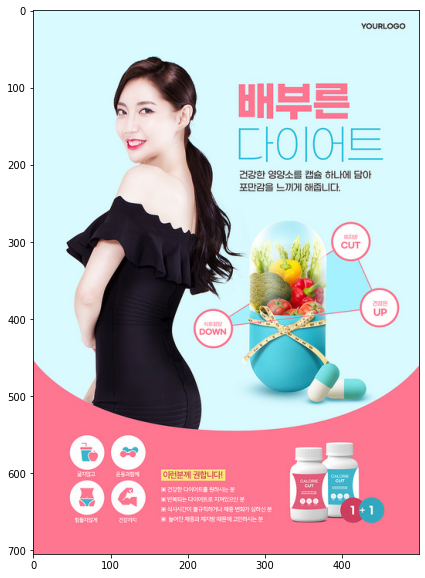

5번째 이미지


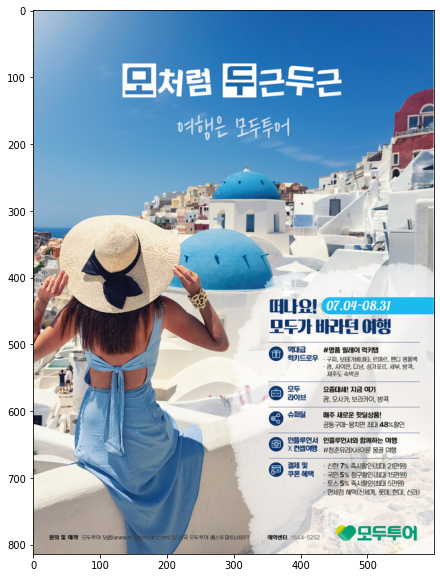

In [5]:
image_list = []

for i in range(5):
    plt.figure(figsize=(15,10))
    img_path = os.getenv('HOME')+'/aiffel/ocr_python/no{}/no{}.jpg'.format(i+1,i+1)
    image_list.append(img_path)
    img_orig = cv2.imread(img_path) 

    print('{}번째 이미지'.format(i+1))

    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.show()

- 저는 화장품, 보험, 음식, 다이어트 식품, 여행 에 관한 홍보 이미지를 들고 왔습니다.
- 해당 이미지에서 강조하고 중요하게 생각하는 특징들이 무엇인지 추출하고자 합니다.

In [6]:
image_list

['/aiffel/aiffel/ocr_python/no1/no1.jpg',
 '/aiffel/aiffel/ocr_python/no2/no2.jpg',
 '/aiffel/aiffel/ocr_python/no3/no3.jpg',
 '/aiffel/aiffel/ocr_python/no4/no4.jpg',
 '/aiffel/aiffel/ocr_python/no5/no5.jpg']

# keras_OCR 활용해보기

In [7]:
images = [keras_ocr.tools.read(image) for image in image_list]
prediction_groups = [pipeline.recognize([image]) for image in image_list]

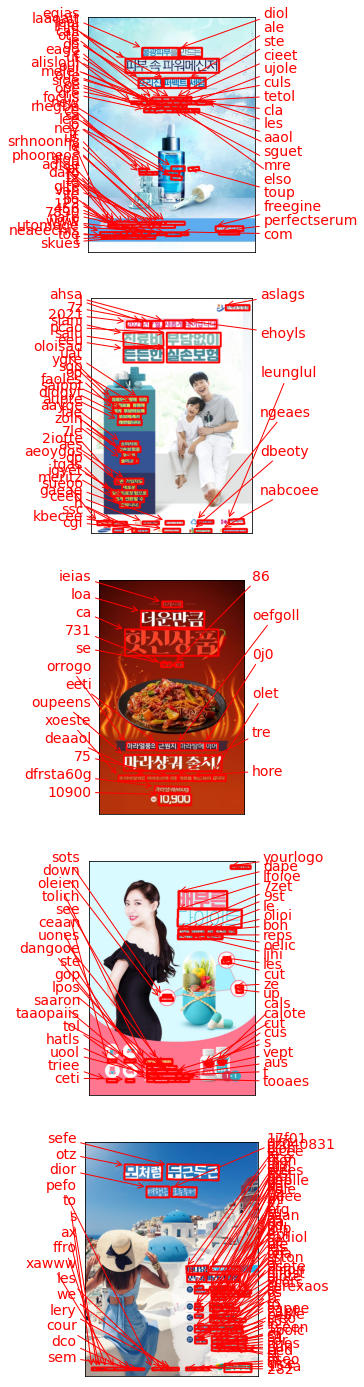

In [8]:
fig, axs = plt.subplots(nrows=len(images), figsize=(35, 25))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

- keras_OCR은 숫자는 생각보다 잘 추출해내지만, 한국어는 잘 추출하지 못하는 것으로 보입니다.
- 테서렉트를 활용하여 보도록 하겠습니다.

# 테서렉트 활용하기

In [9]:
def crop_word_regions(image_path, output_path):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.jpg")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [10]:
for i in range(5):
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/no{}'.format(i+1)
    img_file_path = work_dir + '/no{}.jpg'.format(i+1)

    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/no1/0000.jpg
/aiffel/aiffel/ocr_python/no1/0001.jpg
/aiffel/aiffel/ocr_python/no1/0002.jpg
/aiffel/aiffel/ocr_python/no1/0003.jpg
/aiffel/aiffel/ocr_python/no1/0004.jpg
/aiffel/aiffel/ocr_python/no1/0005.jpg
/aiffel/aiffel/ocr_python/no1/0006.jpg
/aiffel/aiffel/ocr_python/no1/0007.jpg
/aiffel/aiffel/ocr_python/no1/0008.jpg
/aiffel/aiffel/ocr_python/no1/0009.jpg
/aiffel/aiffel/ocr_python/no1/0010.jpg
/aiffel/aiffel/ocr_python/no1/0011.jpg
/aiffel/aiffel/ocr_python/no1/0012.jpg
/aiffel/aiffel/ocr_python/no1/0013.jpg
/aiffel/aiffel/ocr_python/no1/0014.jpg
/aiffel/aiffel/ocr_python/no1/0015.jpg
/aiffel/aiffel/ocr_python/no1/0016.jpg
/aiffel/aiffel/ocr_python/no1/0017.jpg
/aiffel/aiffel/ocr_python/no1/0018.jpg
/aiffel/aiffel/ocr_python/no1/0019.jpg
/aiffel/aiffel/ocr_python/no1/0020.jpg
/aiffel/aiffel/ocr_python/no1/0021.jpg
/aiffel/aiffel/ocr_python/no1/0022.jpg
/aiffel/aiffel/ocr_python/no1/0023.jpg
/aiffel/aiffel/ocr_python/no1/0024.jpg
/aiffel/aiffel/ocr_python

/aiffel/aiffel/ocr_python/no5/0000.jpg
/aiffel/aiffel/ocr_python/no5/0001.jpg
/aiffel/aiffel/ocr_python/no5/0002.jpg
/aiffel/aiffel/ocr_python/no5/0003.jpg
/aiffel/aiffel/ocr_python/no5/0004.jpg
/aiffel/aiffel/ocr_python/no5/0005.jpg
/aiffel/aiffel/ocr_python/no5/0006.jpg
/aiffel/aiffel/ocr_python/no5/0007.jpg
/aiffel/aiffel/ocr_python/no5/0008.jpg
/aiffel/aiffel/ocr_python/no5/0009.jpg
/aiffel/aiffel/ocr_python/no5/0010.jpg
/aiffel/aiffel/ocr_python/no5/0011.jpg
/aiffel/aiffel/ocr_python/no5/0012.jpg
/aiffel/aiffel/ocr_python/no5/0013.jpg
/aiffel/aiffel/ocr_python/no5/0014.jpg
/aiffel/aiffel/ocr_python/no5/0015.jpg
/aiffel/aiffel/ocr_python/no5/0016.jpg
/aiffel/aiffel/ocr_python/no5/0017.jpg
/aiffel/aiffel/ocr_python/no5/0018.jpg
/aiffel/aiffel/ocr_python/no5/0019.jpg
/aiffel/aiffel/ocr_python/no5/0020.jpg
/aiffel/aiffel/ocr_python/no5/0021.jpg
/aiffel/aiffel/ocr_python/no5/0022.jpg
/aiffel/aiffel/ocr_python/no5/0023.jpg
/aiffel/aiffel/ocr_python/no5/0024.jpg
/aiffel/aiffel/ocr_python

- 각 이미지별로 이미지에 있는 단어들을 추출하였습니다.
- 해당 단어들을 확인해보도록 하겠습니다.

In [25]:
cropped_image_path_list

['/aiffel/aiffel/ocr_python/no5/0000.jpg',
 '/aiffel/aiffel/ocr_python/no5/0001.jpg',
 '/aiffel/aiffel/ocr_python/no5/0002.jpg',
 '/aiffel/aiffel/ocr_python/no5/0003.jpg',
 '/aiffel/aiffel/ocr_python/no5/0004.jpg',
 '/aiffel/aiffel/ocr_python/no5/0005.jpg',
 '/aiffel/aiffel/ocr_python/no5/0006.jpg',
 '/aiffel/aiffel/ocr_python/no5/0007.jpg',
 '/aiffel/aiffel/ocr_python/no5/0008.jpg',
 '/aiffel/aiffel/ocr_python/no5/0009.jpg',
 '/aiffel/aiffel/ocr_python/no5/0010.jpg',
 '/aiffel/aiffel/ocr_python/no5/0011.jpg',
 '/aiffel/aiffel/ocr_python/no5/0012.jpg',
 '/aiffel/aiffel/ocr_python/no5/0013.jpg',
 '/aiffel/aiffel/ocr_python/no5/0014.jpg',
 '/aiffel/aiffel/ocr_python/no5/0015.jpg',
 '/aiffel/aiffel/ocr_python/no5/0016.jpg',
 '/aiffel/aiffel/ocr_python/no5/0017.jpg',
 '/aiffel/aiffel/ocr_python/no5/0018.jpg',
 '/aiffel/aiffel/ocr_python/no5/0019.jpg',
 '/aiffel/aiffel/ocr_python/no5/0020.jpg',
 '/aiffel/aiffel/ocr_python/no5/0021.jpg',
 '/aiffel/aiffel/ocr_python/no5/0022.jpg',
 '/aiffel/a

In [11]:
image_path = os.getenv('HOME')+'/aiffel/ocr_python'
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [19]:
def image_check(forder_name, image_name):
    print('원본 이미지')
    image_path1 = image_path + forder_name
    img = plt.imread(image_path1+image_name)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print('\n')
    print('추출된 이미지')
    file_list = os.listdir(image_path1) 
    for i in range(len(file_list)-2):
        img = cv2.imread(image_path1 + '{}.jpg'.format(str(i).zfill(4)))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'index: {i}')
        plt.axis('off')
        plt.show()

원본 이미지


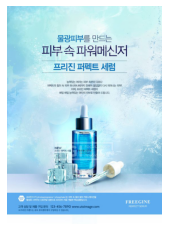



추출된 이미지


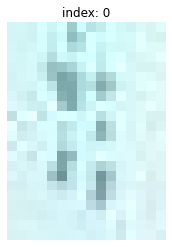

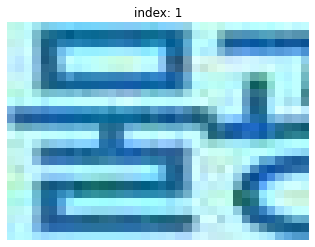

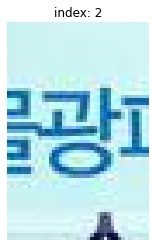

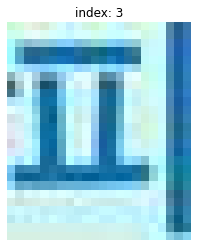

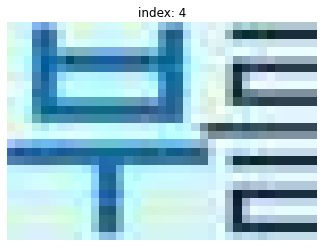

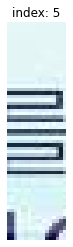

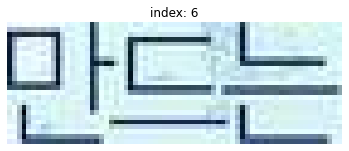

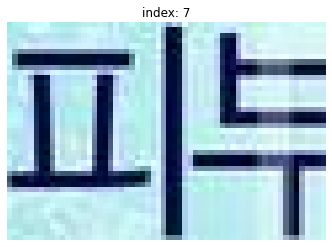

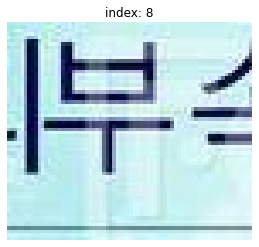

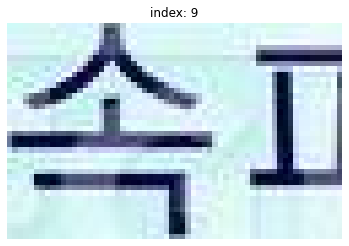

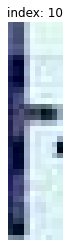

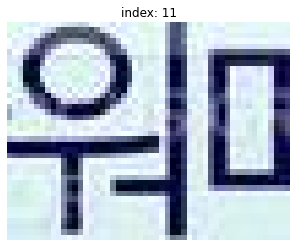

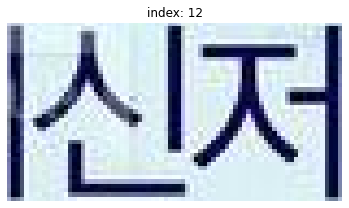

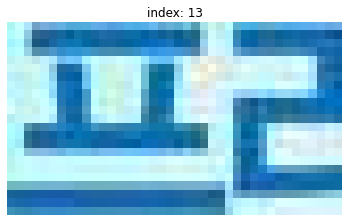

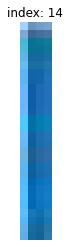

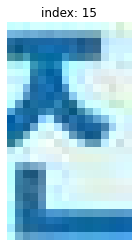

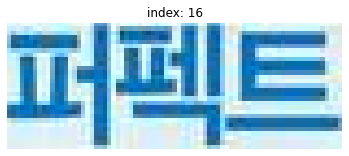

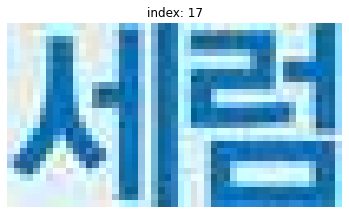

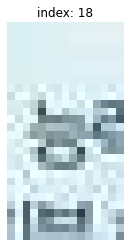

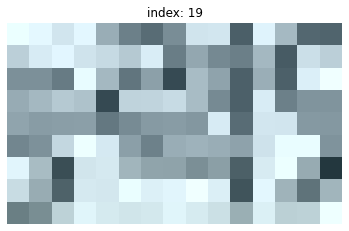

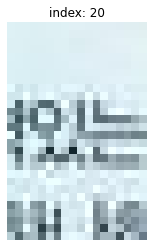

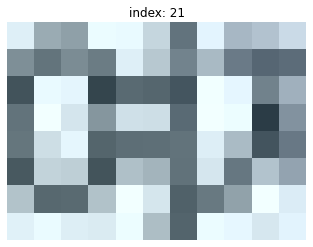

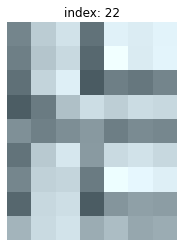

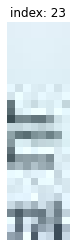

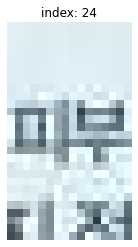

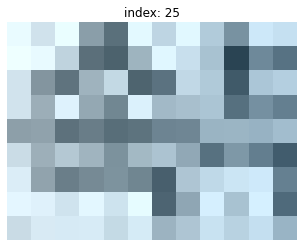

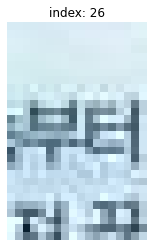

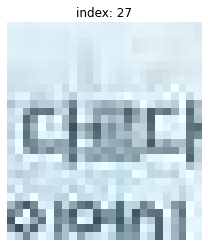

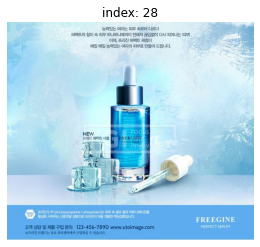

In [21]:
image_check('/no1/', 'no1.jpg')

- 물광, 피부, 퍼펙트, 세럼 등 단어를 잘 뽑아낸것을 확인할 수 있습니다.

원본 이미지


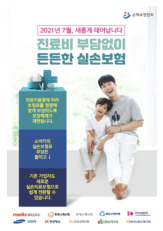



추출된 이미지


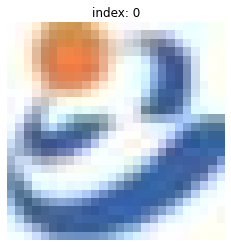

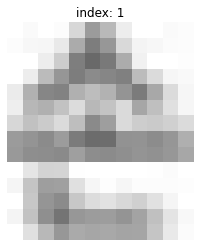

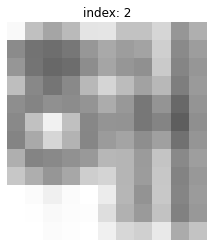

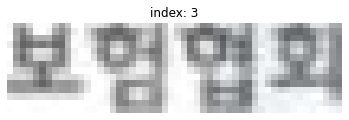

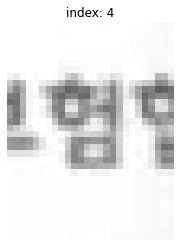

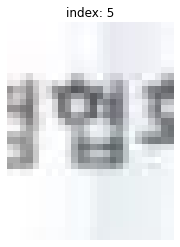

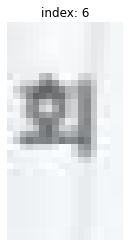

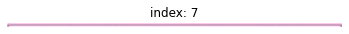

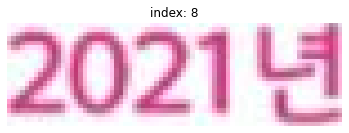

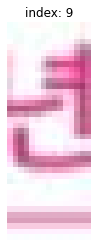

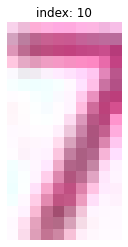

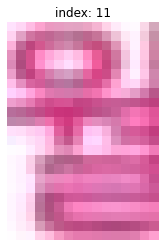

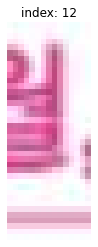

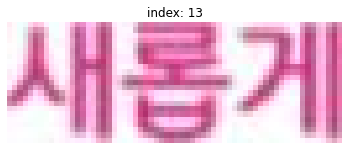

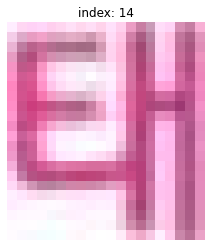

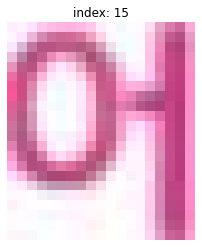

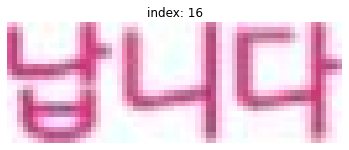

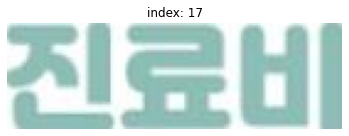

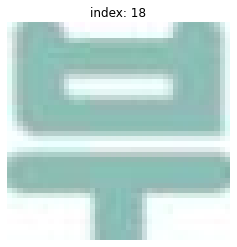

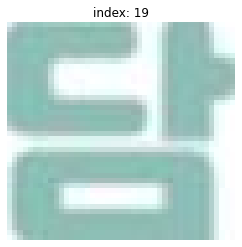

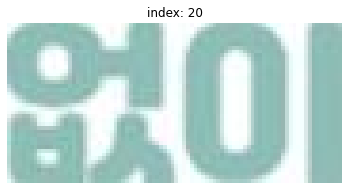

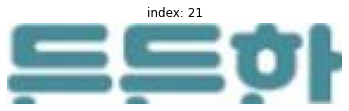

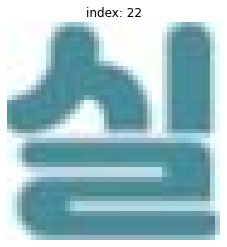

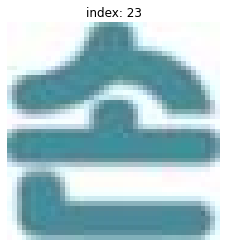

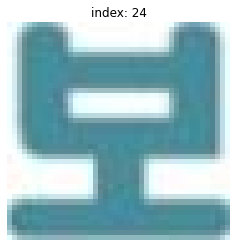

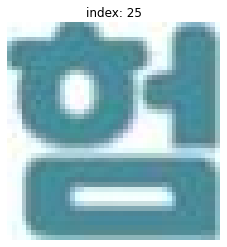

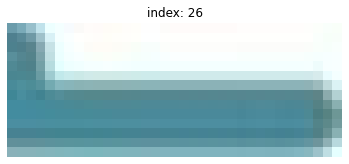

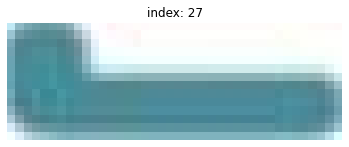

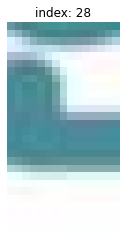

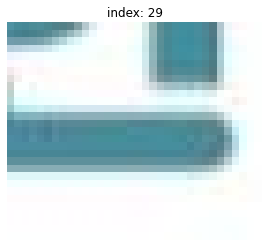

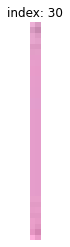

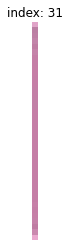

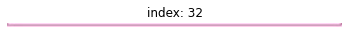

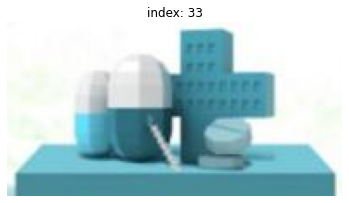

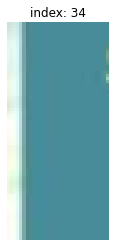

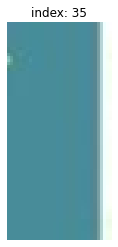

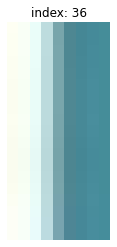

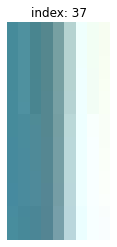

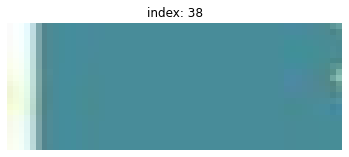

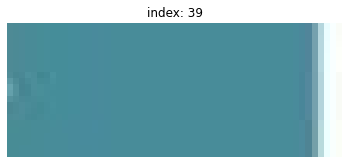

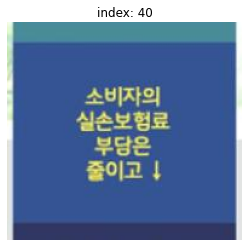

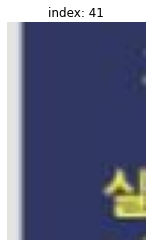

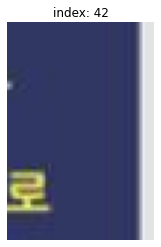

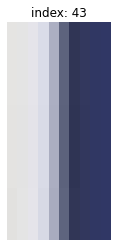

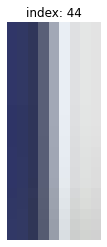

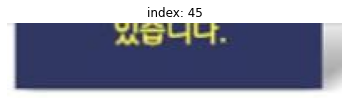

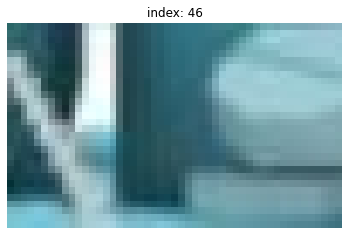

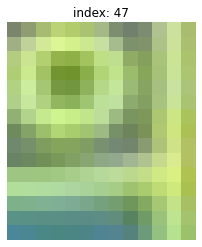

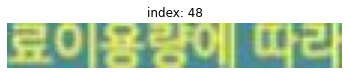

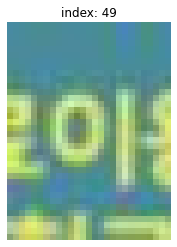

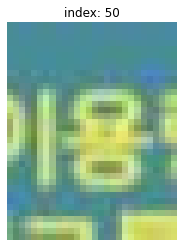

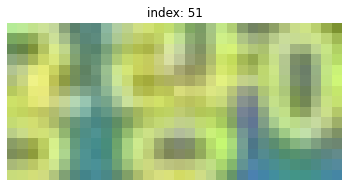

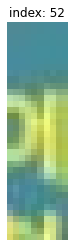

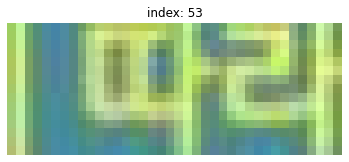

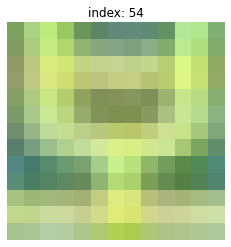

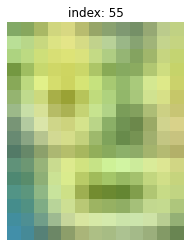

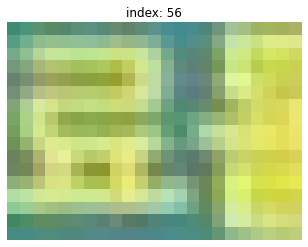

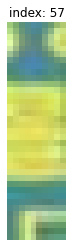

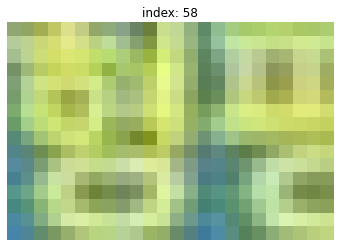

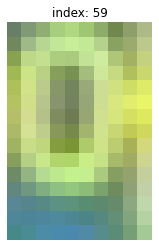

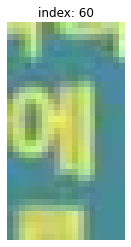

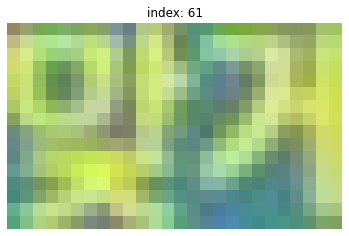

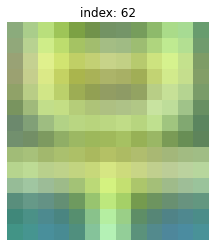

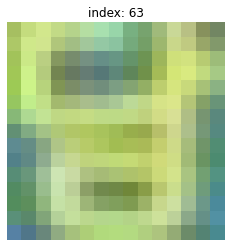

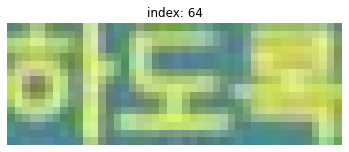

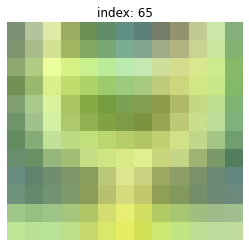

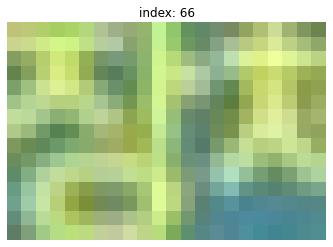

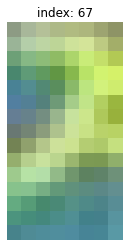

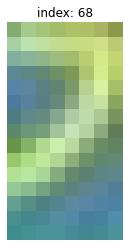

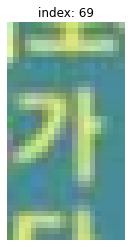

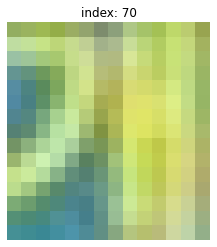

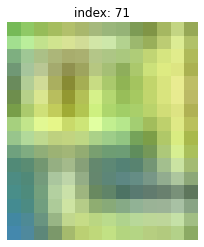

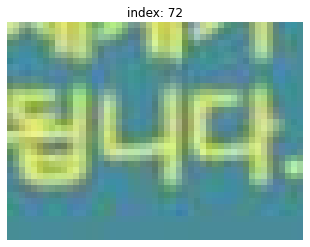

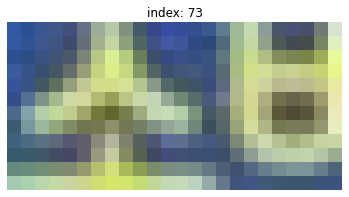

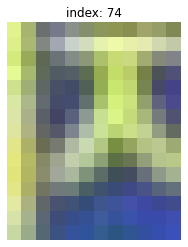

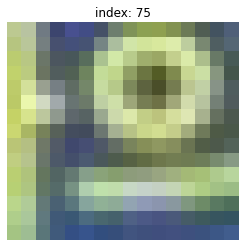

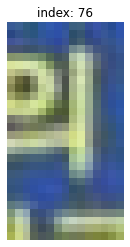

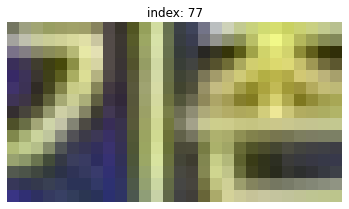

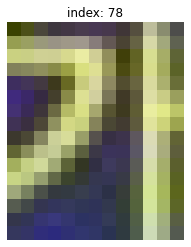

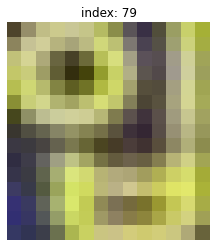

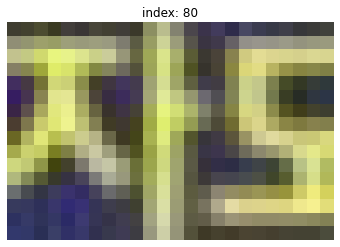

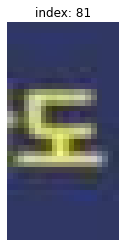

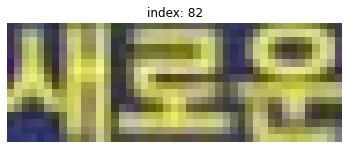

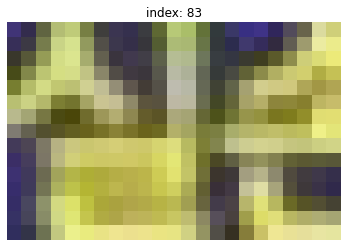

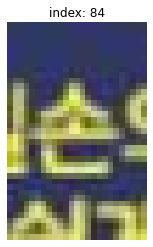

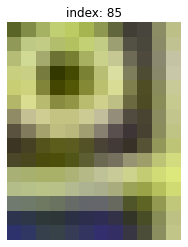

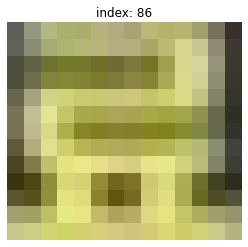

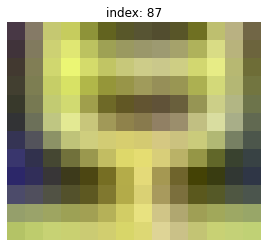

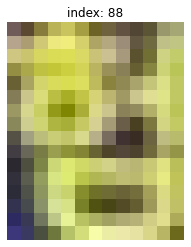

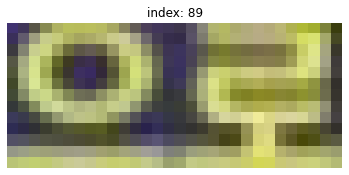

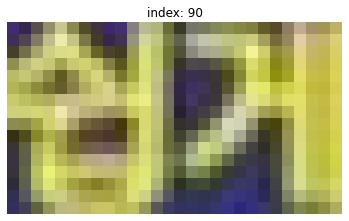

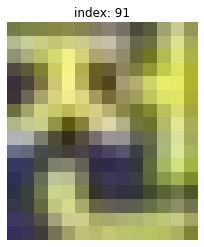

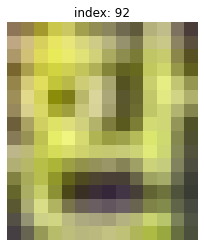

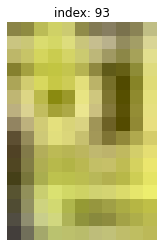

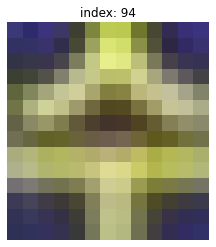

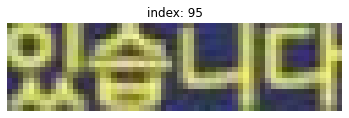

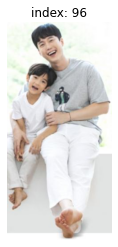

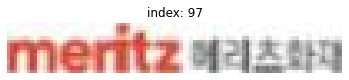

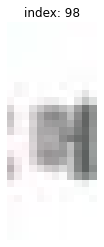

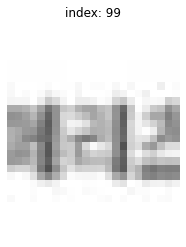

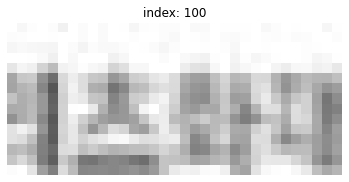

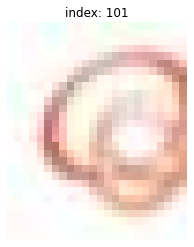

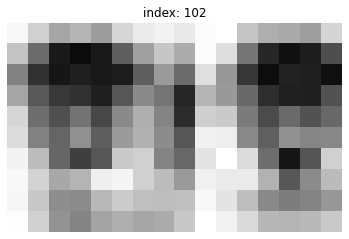

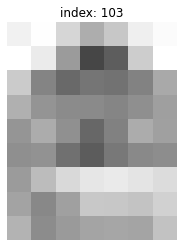

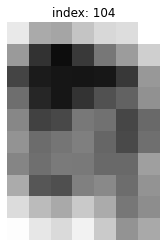

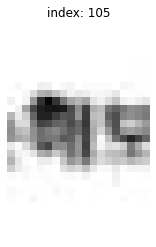

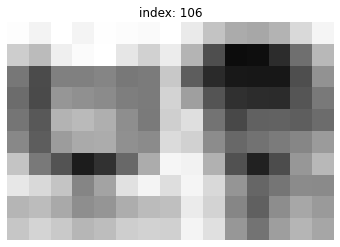

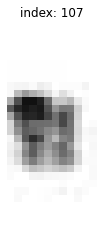

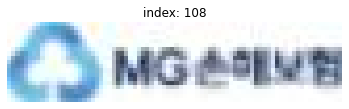

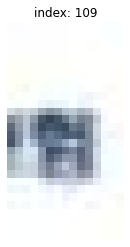

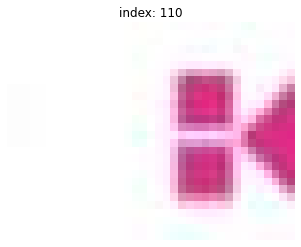

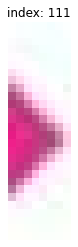

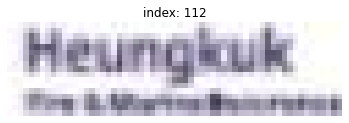

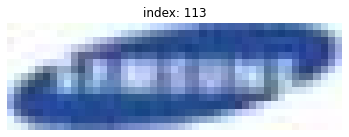

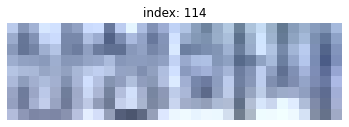

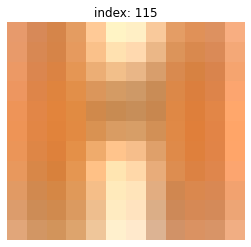

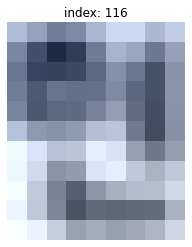

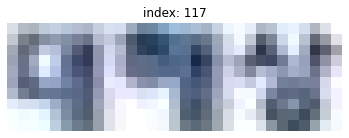

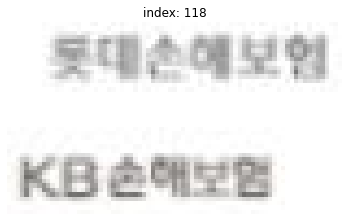

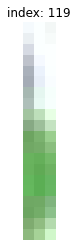

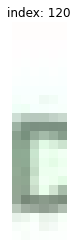

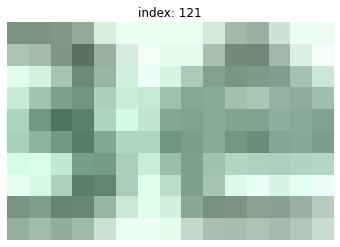

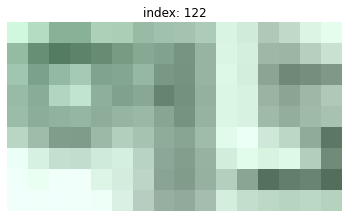

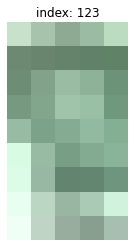

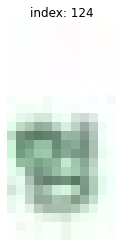

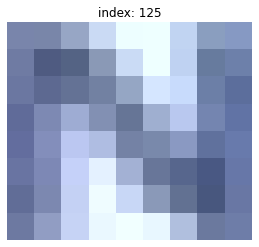

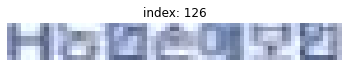

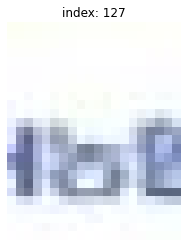

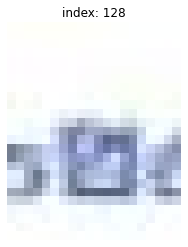

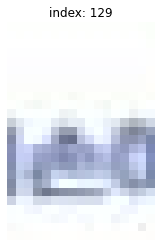

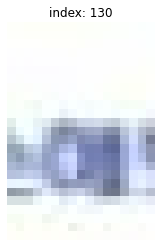

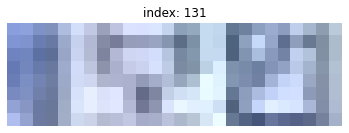

In [20]:
image_check('/no2/', 'no2.jpg')

- 보험협회, 진료비, 부담없이, 실손보험 등의 주요 단어를 잘 뽑아냈습니다.

원본 이미지


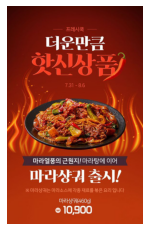



추출된 이미지


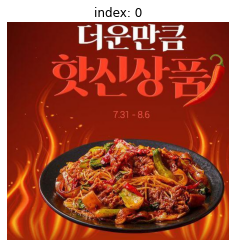

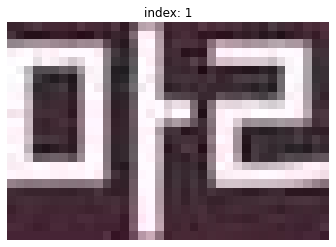

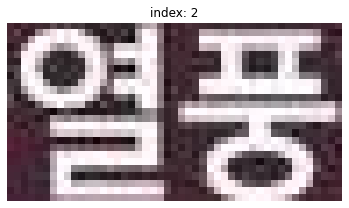

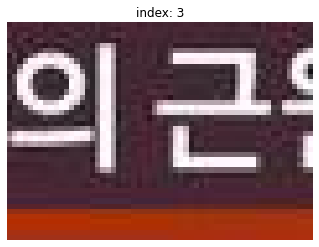

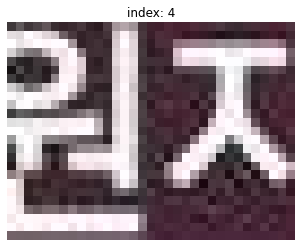

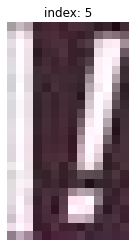

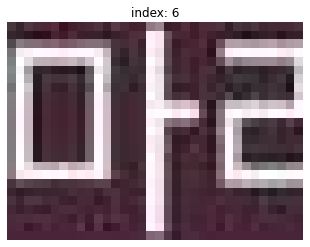

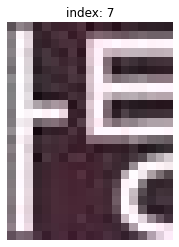

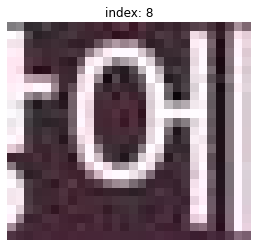

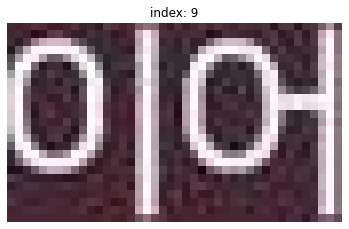

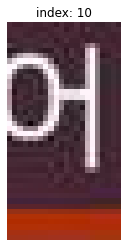

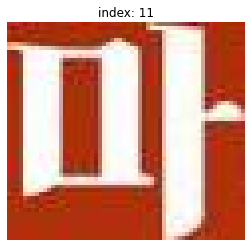

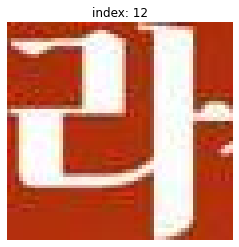

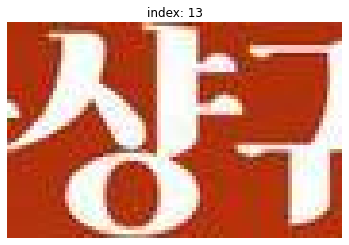

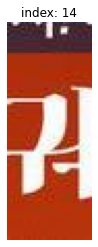

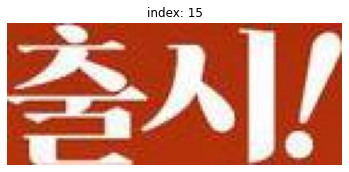

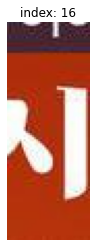

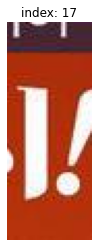

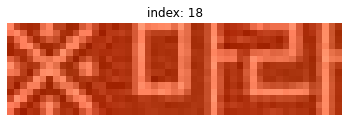

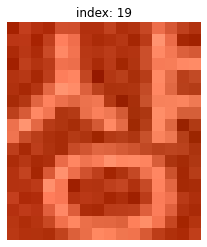

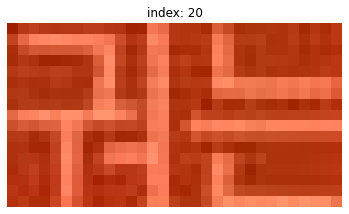

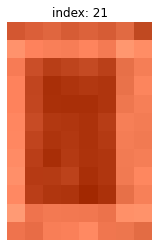

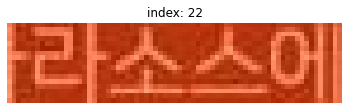

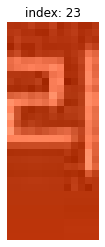

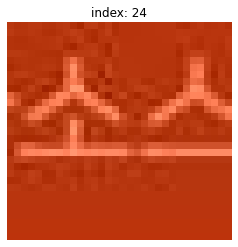

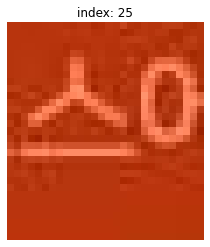

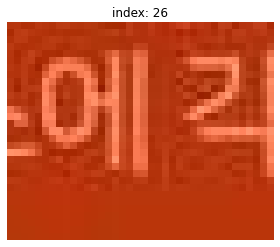

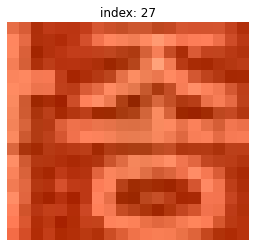

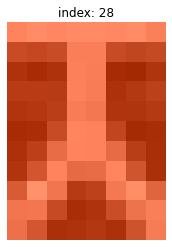

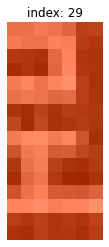

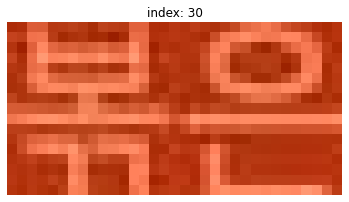

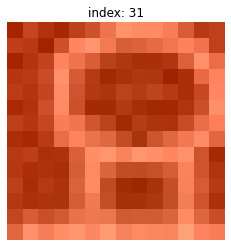

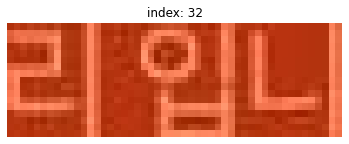

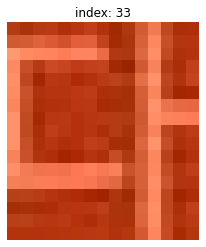

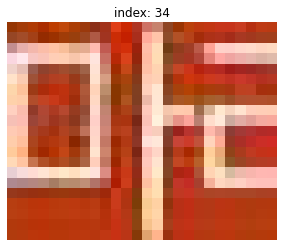

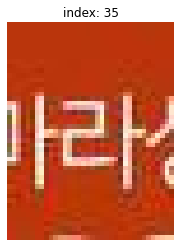

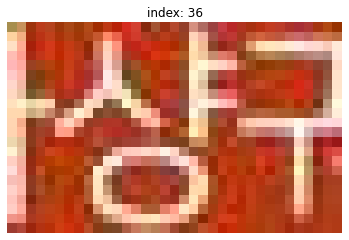

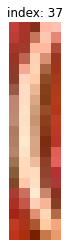

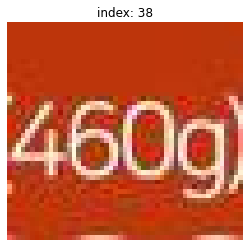

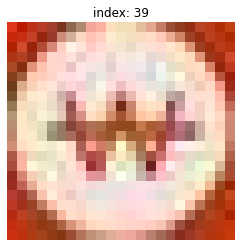

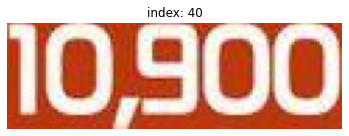

In [22]:
image_check('/no3/', 'no3.jpg')

- 열풍, 마라상궈, 가격 등 주요 단어를 잘 추출했습니다.

원본 이미지


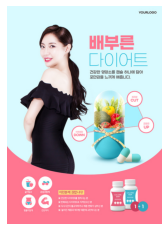



추출된 이미지


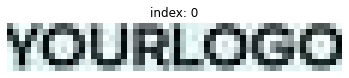

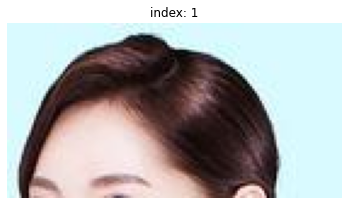

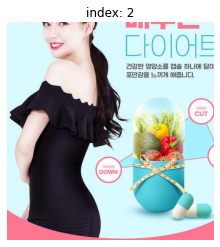

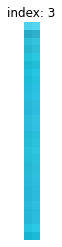

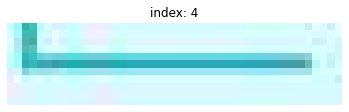

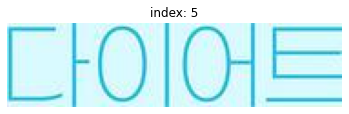

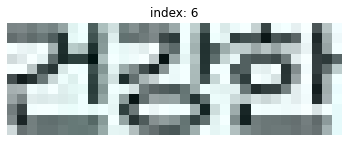

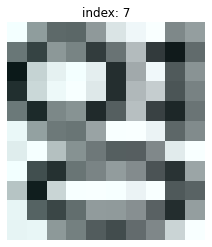

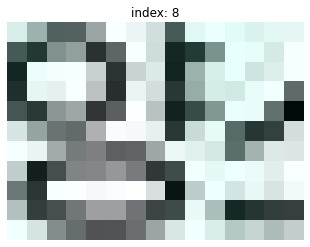

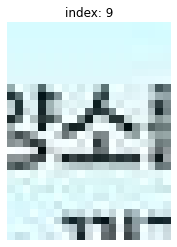

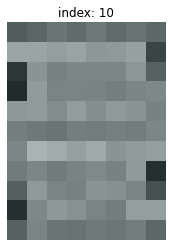

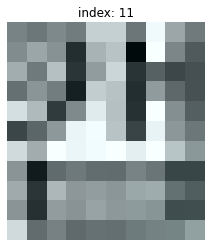

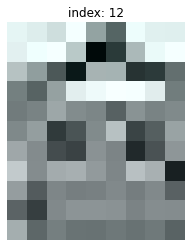

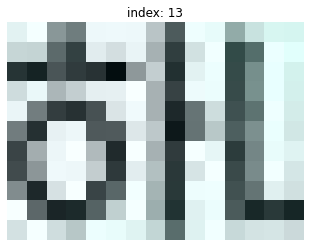

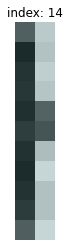

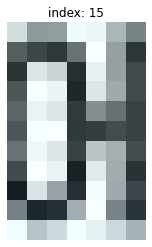

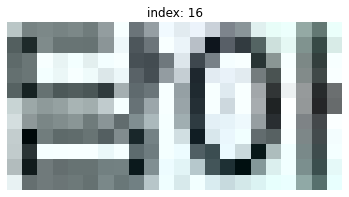

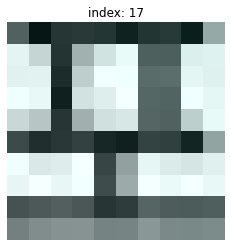

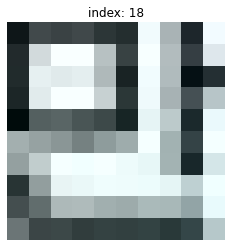

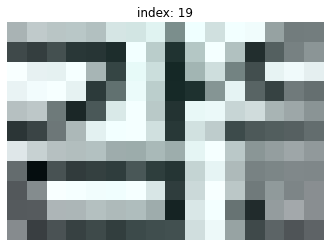

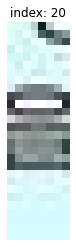

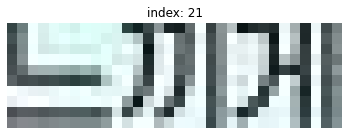

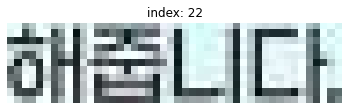

In [23]:
image_check('/no4/', 'no4.jpg')

- 다이어트, 건강한, 포만감 등의 단어를 뽑아냈습니다.

원본 이미지


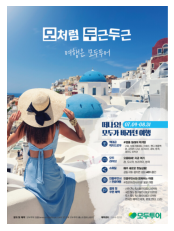



추출된 이미지


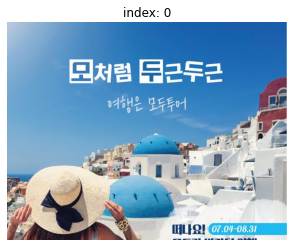

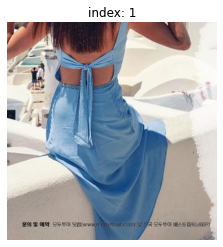

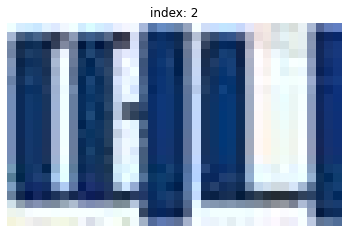

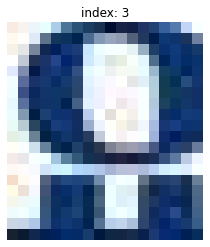

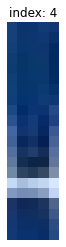

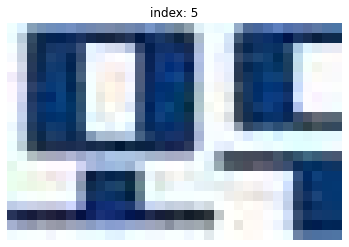

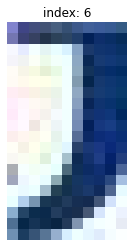

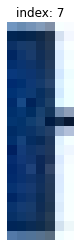

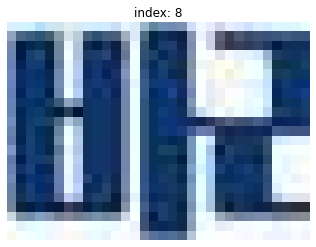

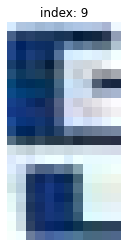

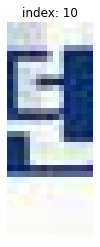

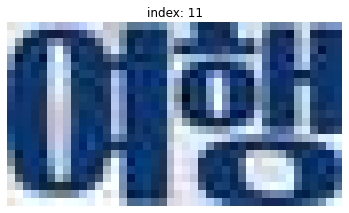

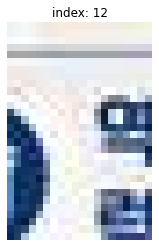

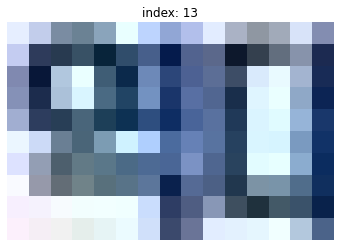

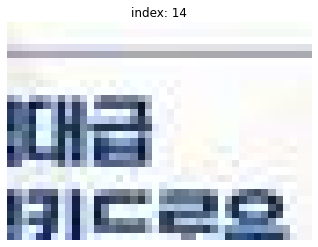

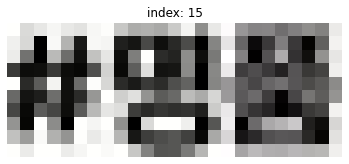

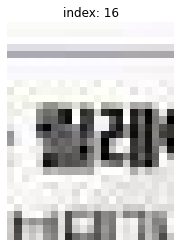

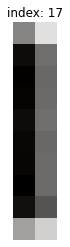

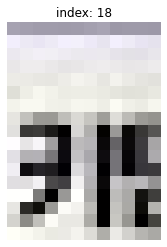

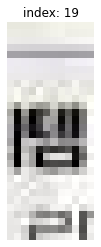

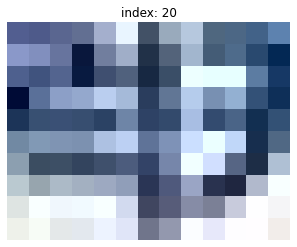

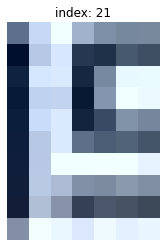

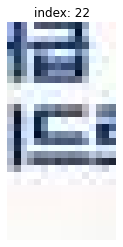

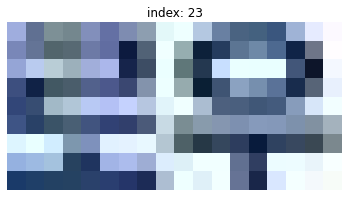

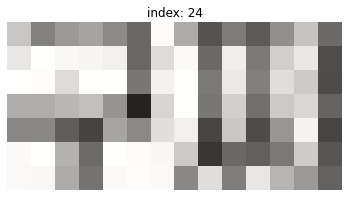

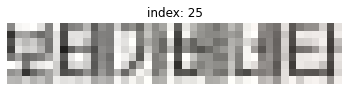

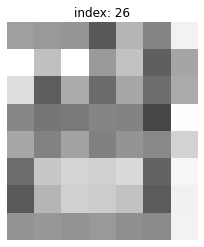

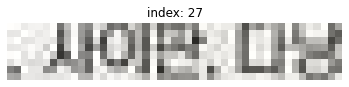

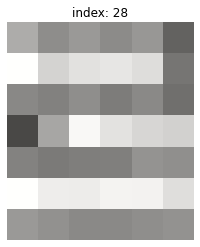

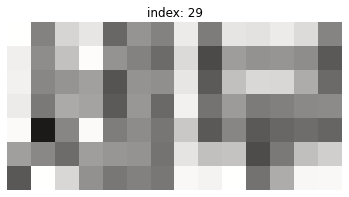

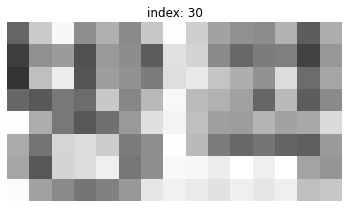

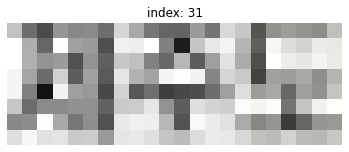

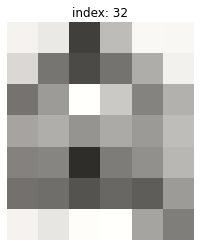

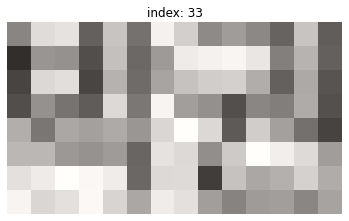

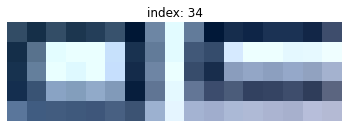

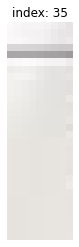

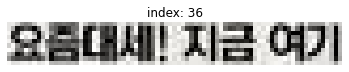

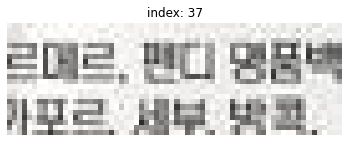

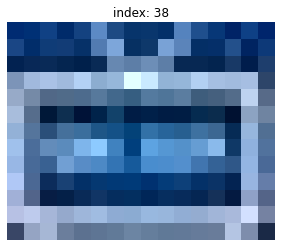

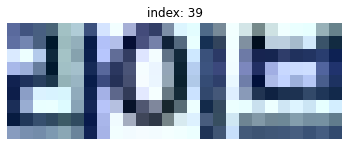

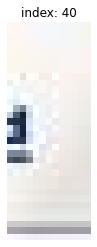

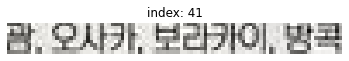

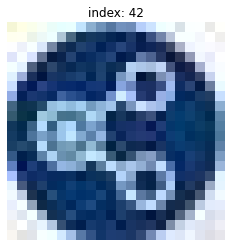

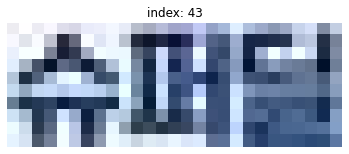

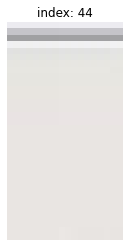

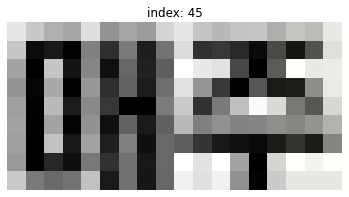

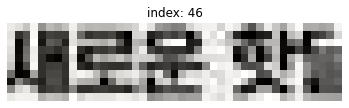

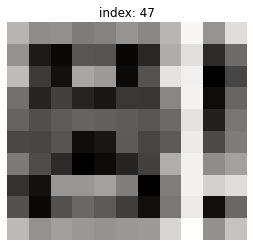

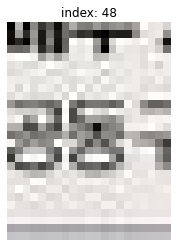

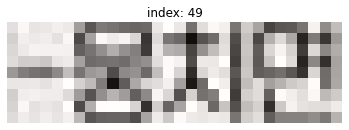

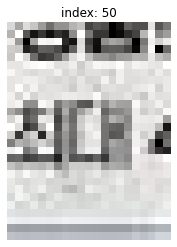

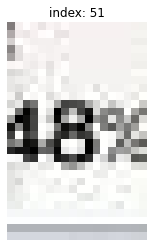

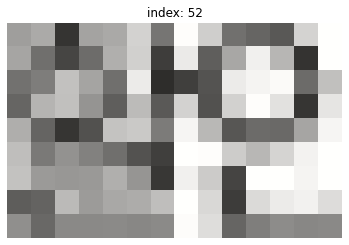

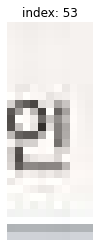

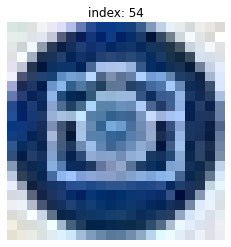

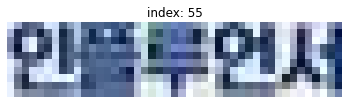

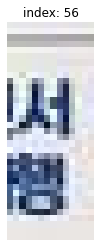

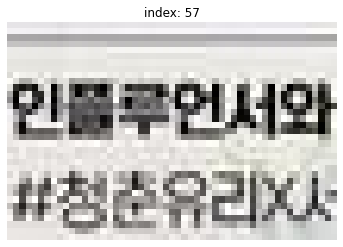

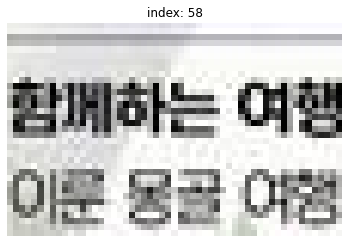

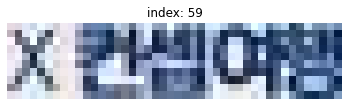

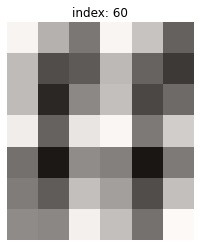

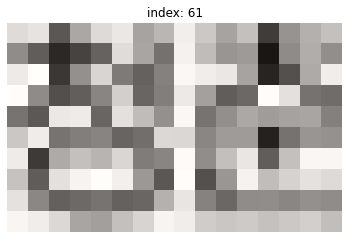

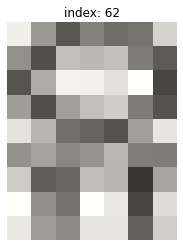

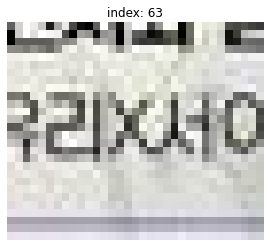

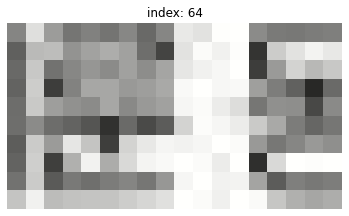

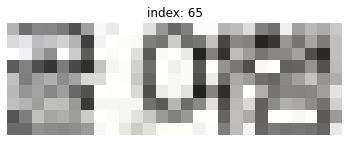

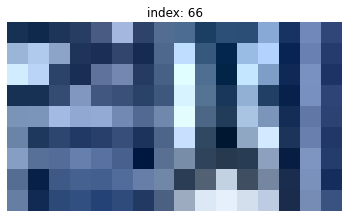

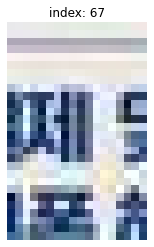

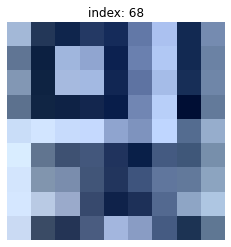

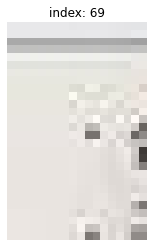

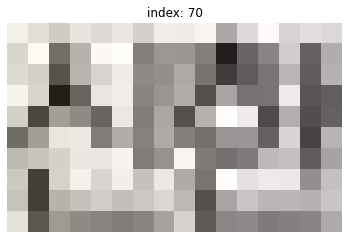

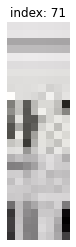

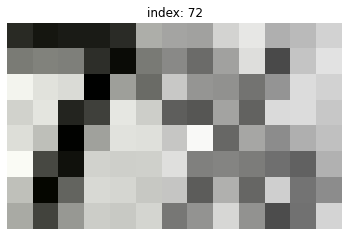

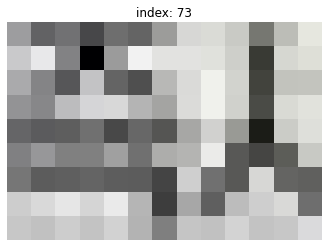

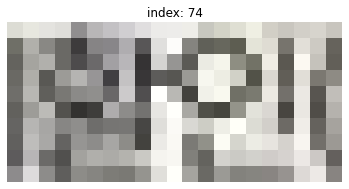

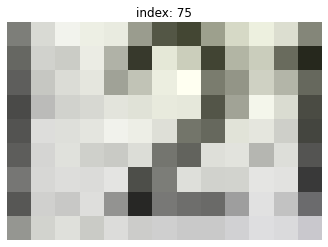

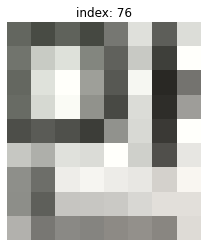

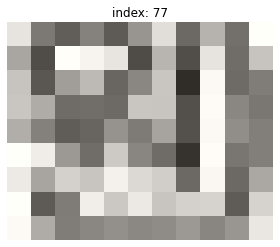

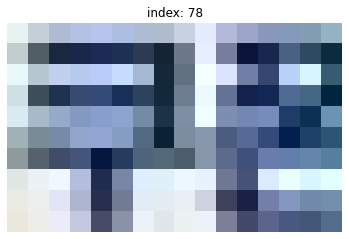

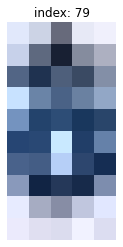

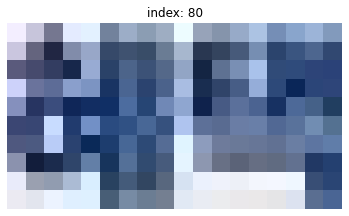

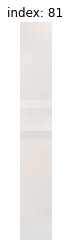

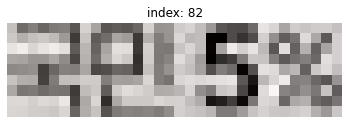

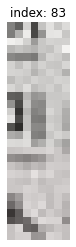

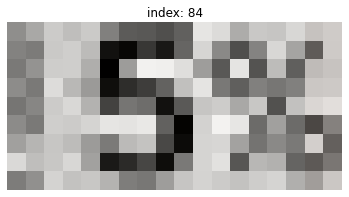

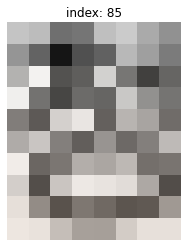

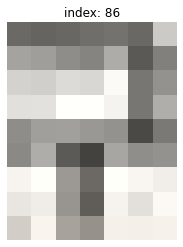

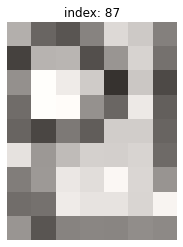

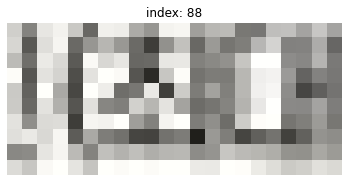

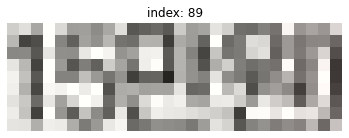

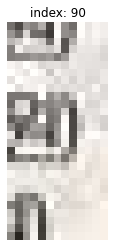

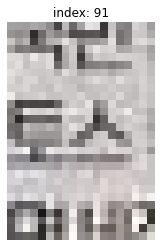

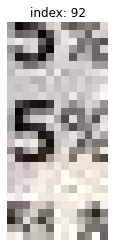

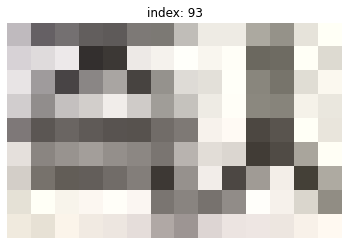

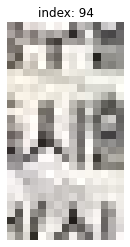

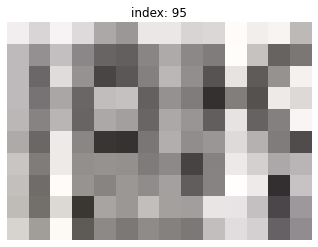

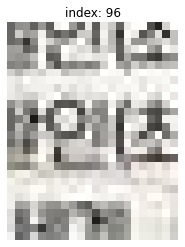

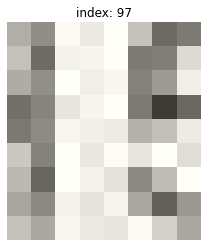

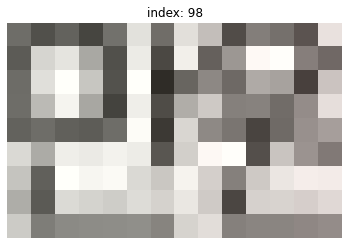

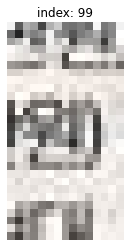

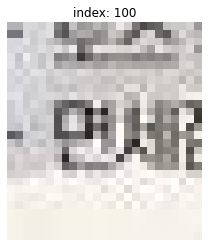

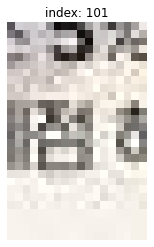

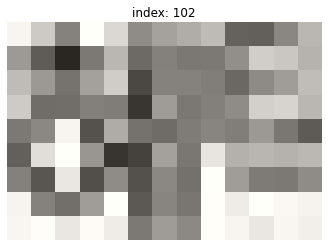

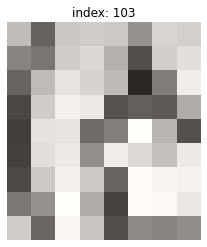

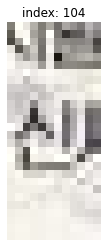

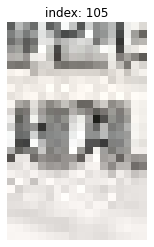

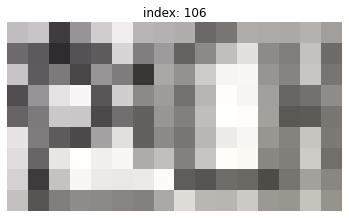

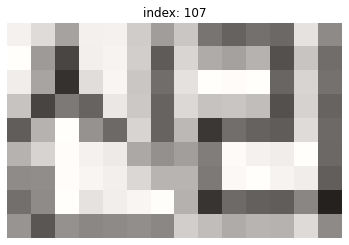

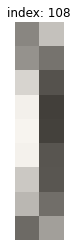

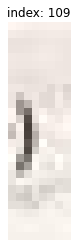

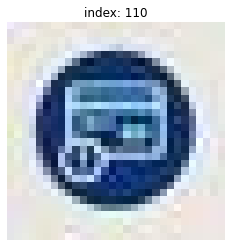

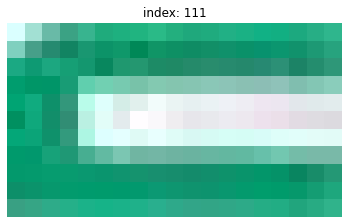

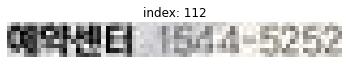

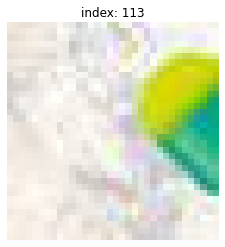

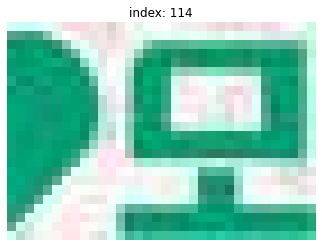

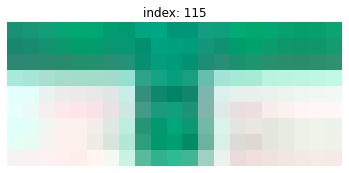

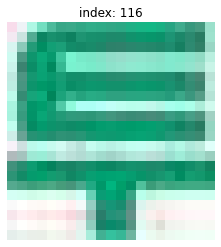

In [24]:
image_check('/no5/', 'no5.jpg')

- 다섯개의 사진 중 가장 많은 단어를 뽑아냈습니다.
- 여행, 사이판, 다낭, 괌, 오사카 보라카이 등의 여행지 단어를 잘 뽑아낸것을 볼 수 있습니다.

# 결과 확인 

In [45]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_name in cropped_image_path_list:
        image_path = os.path.join(image_path1, image_name)
        if image_name.startswith('0'):
            image = Image.open(image_path)
            recognized_data = pytesseract.image_to_string(
                image, lang='kor',    # 한국어라면 lang='kor'
                config=custom_oem_psm_config,
                output_type=Output.DICT
            )
            print(recognized_data['text'])
    print("Done")

In [46]:
image_path1 = os.getenv('HOME') + '/aiffel/ocr_python/no1'
file_list = os.listdir(image_path1) 
recognize_images(file_list)

는

세럼

부터

=

띠부

분=

비드

눌능

퍼펜트

ㄷ

|

수 Ｌ


다르다


;

마드는

신저

속속


주가 놀

오|[

항1

피|

&

끄근

'

있는

감

Done


In [47]:
image_path1 = os.getenv('HOME') + '/aiffel/ocr_python/no2'
file_list = os.listdir(image_path1) 
recognize_images(file_list)

를

1


『"


11

기

| 내

내해상

7

보

0"

'【그|

그

:

리

=

|


7

개

|

~

1 오

!

으

.험<

도

앞거

6

4

김


땐

1

<오250


원


2021년

료니용당에 나다

우호

0 게제매02020000000220000재재지22200제0000200=0=2제0000022===패제


|

갔습니다

16

주


납니다

아게 아세



~

|       누진       |

=

칠

;먼


로

| 낙다

대

10009

10202 -

련

0

더

1.

"1

니뿐

이

0

ㅅ


4


11181 하고 히기츠한다

스6

|

2


미그

|

협

|


/

츠함대

심근

로


회



|

0

그

기.

0


2

크

고 72 노0』|

'.

이

뤄

됩니다.

| 릉

염

가

해

시

에,

[거

보엄엽의

(기

어

이

4

「


*

새롭게

)

으득하

2 (|

",

으론

교5

기

-》

《 > 40 스에부위

Done


In [48]:
image_path1 = os.getenv('HOME') + '/aiffel/ocr_python/no3'
file_list = os.listdir(image_path1) 
recognize_images(file_list)

마ㄷ

17 오,

1

에기

4609

나

리지

소스

|,

0,|

본

마2


도

구려 아노

:

기 1빼

이어

다

10900

입

3

|

1"

상구

|

미대

닐

스

<”

ㅅ

나

바

포그

나으

숙시/

개

8

=

빼,

전

Done


In [49]:
image_path1 = os.getenv('HOME') + '/aiffel/ocr_python/no4'
file_list = os.listdir(image_path1) 
recognize_images(file_list)

ㅣ


니아

520

2

^”

넘나

해줌 |

:

스|

| 바트

두

강인


가드




뷰

아Ｌ

ㄴㄴ)


"()\가| ()(5(7

Done


In [50]:
image_path1 = os.getenv('HOME') + '/aiffel/ocr_python/no5'
file_list = os.listdir(image_path1) 
recognize_images(file_list)

때

들

-ㅋ1

나누

9


품「


가

|

~”

…

가

|

223

바가


시하



1새건

|

시

!


2

^

~ 중

0


0]


씨구노


분

25


[

^

55

|하<

개 :

1 5%

월래

모

벽난사가, 바라기니, 방곡

20094

(9)

배주

1

드

=

(9

건

때3

매와샌터 ㅣ 1 20

우

드

9

애

15259]

24 서


| 21

할이(

결

내

| !

20040

두우

눈

나기}

=메르, 번디 명음백

태토

요슴내세! 지금 여기

점

내

0

1

}


)

의

코데 .가[5 게다

때다

구


구폰

0

고

빔

카리 (가인


/

내로문 핫들

반들두면서

1118

84.

1

…

1"

예벽

# 명품

-북지낸


{+

시그

거]

림난

트

=

고

저번 2

빅 7서

'


|

Done


- 전체적으로 결과가 아주 안좋아보입니다.
- 글자라고 할 수 있는 것들이 없는것으로 보여집니다.
- 이런 결과를 가지고는 특정 제품을 홍보하기에는 무리라고 생각이 됩니다.
- 오히려 글자를 뽑기 위한 이미지들에서 글자가 제대로 뽑힌 것을 볼 수 있습니다.

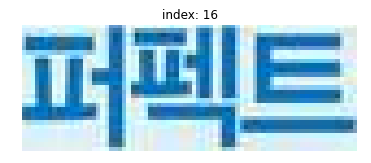

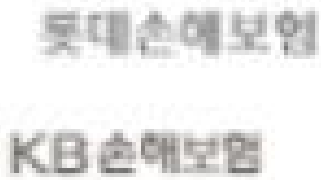

# 전체 회고

- 전체적으로 어려움 없이 진행한 프로젝트였습니다.
- 이전 CV task때 배운 것들을 활용하고자 하였으며, 함수화 시키고자 하였습니다.
- 다만 CV가 익숙하지 않다보니 성능을 향상시키는 것은 하지 못했습니다.
- 이미지에서 텍스트는 추출을 잘했는데, 해당 이미지를 텍스트화시키는 것은 잘 못한거 같습니다.
- 해당 방법을 개선시키기 위해서는 pytesseract를 확인해봐야 할 것으로 생각됩니다.

# 참고자료
- https://keras-ocr.readthedocs.io/en/latest/